##Q5##
Following crime datasets are used for analysis.
"C:\Users\Sai\Desktop\Q3\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv"
"C:\Users\Sai\Desktop\Q3\02_District_wise_crimes_committed_against_ST_2001_2012.csv"
"C:\Users\Sai\Desktop\Q3\03_District_wise_crimes_committed_against_children_2001_2012.csv"
"C:\Users\Sai\Desktop\Q3\01_District_wise_crimes_committed_IPC_2001_2012.csv"

Importing libraries'
Reading files into dataframes.
Renaming necessary categories.
Groups the data by 'State' and sums up all crime values to get the total crime count per state.
Merges the four datasets to create a combined dataset with crime totals from all categories.
Uses left join to ensure that states present in some datasets but missing in others still appear.
Sums all numeric columns (excluding the 'State' column) to compute the total crimes per state.
Sorts states based on the total number of crimes.
Selects the top 5 states with the highest crime rates.
Creates a bar chart displaying the total crimes for the top 5 states.
Labels axes, adds a title, and rotates state names for better readability.
Uses a grid to improve visualization clarity.

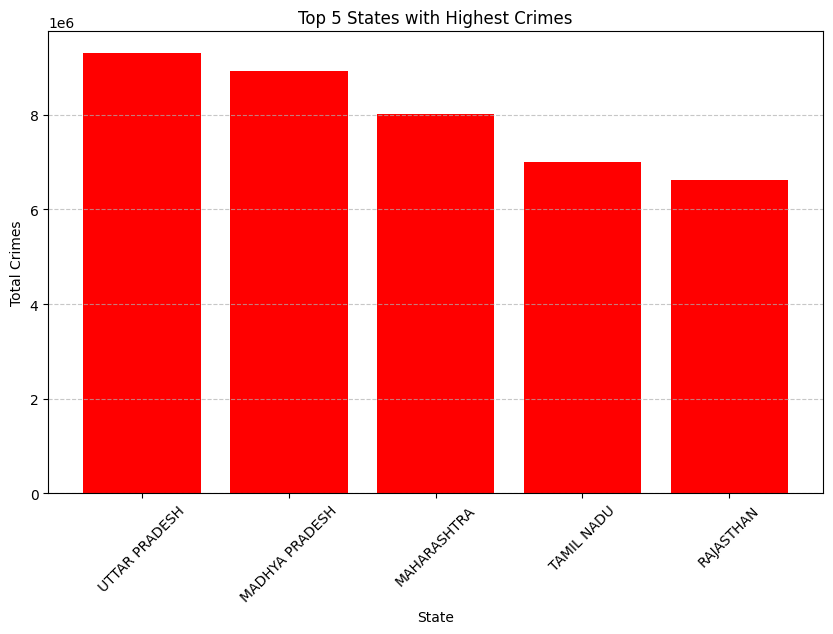

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_paths = {
    "IPC Crimes":r"C:\Users\Sai\Desktop\Q3\01_District_wise_crimes_committed_IPC_2001_2012.csv",
    "Crimes Against SC":r"C:\Users\Sai\Desktop\Q3\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv",
    "Crimes Against Children":r"C:\Users\Sai\Desktop\Q3\02_District_wise_crimes_committed_against_ST_2001_2012.csv",
    "Crimes Against ST":r"C:\Users\Sai\Desktop\Q3\03_District_wise_crimes_committed_against_children_2001_2012.csv"
}


df_ipc = pd.read_csv(file_paths["IPC Crimes"])
df_sc = pd.read_csv(file_paths["Crimes Against SC"])
df_children = pd.read_csv(file_paths["Crimes Against Children"])
df_st = pd.read_csv(file_paths["Crimes Against ST"])

df_ipc.rename(columns={"STATE/UT": "State"}, inplace=True)
df_sc.rename(columns={"STATE/UT": "State"}, inplace=True)
df_children.rename(columns={"STATE/UT": "State"}, inplace=True)
df_st.rename(columns={"STATE/UT": "State"}, inplace=True)


total_crimes_ipc = df_ipc.groupby("State")["TOTAL IPC CRIMES"].sum().reset_index()
total_crimes_sc = df_sc.groupby("State").sum().reset_index()
total_crimes_children = df_children.groupby("State").sum().reset_index()
total_crimes_st = df_st.groupby("State").sum().reset_index()

crime_data = total_crimes_ipc.merge(total_crimes_sc, on="State", how="left")
crime_data = crime_data.merge(total_crimes_children, on="State", how="left")
crime_data = crime_data.merge(total_crimes_st, on="State", how="left")

crime_data["Total Crimes"] = crime_data.iloc[:, 1:].sum(axis=1, numeric_only=True)

top_5_states = crime_data.sort_values(by="Total Crimes", ascending=False).head(5)


plt.figure(figsize=(10, 6))
plt.bar(top_5_states["State"], top_5_states["Total Crimes"], color='red')
plt.xlabel("State")
plt.ylabel("Total Crimes")
plt.title("Top 5 States with Highest Crimes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()